In [1]:
!pip install --upgrade dagshub mlflow seaborn matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 54.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 92.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
import dagshub
dagshub.init(repo_owner='nmach22', repo_name='house-prices-ml', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=e8af7545-46ea-4401-84ec-e2d3745cbe22&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=82dcc01246a48610c824a650f2ed8a6334c71a978c252c68f8e7355fc8dd7029




Output()

Accessing as nmach22

Initialized MLflow to track repo "nmach22/house-prices-ml"

Repository nmach22/house-prices-ml initialized!

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
# pd.set_option('display.expand_frame_repr', False)

In [5]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.shape

(1460, 81)

In [6]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.shape

(1459, 80)

In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [266]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

random_seed = 40

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.001, random_state=random_seed)

In [267]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1458, 80), (2, 80), (1458,), (2,))

In [268]:
X_train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1181,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
1108,1109,60,RL,NaN,8063,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml
554,555,60,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
287,288,20,RL,NaN,8125,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
110,111,50,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1017,20,RL,73.0,11883,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
219,220,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial


In [269]:
# print column which contains nans:
columns_with_nulls = {}
for column_name, count in X_train.isna().sum(axis=0).items():
    if count > 0:
        print(f'{column_name}: {count} - {X_train[column_name].dtype}')
        columns_with_nulls[column_name] = count

LotFrontage: 258 - float64
Alley: 1367 - object
MasVnrType: 872 - object
MasVnrArea: 8 - float64
BsmtQual: 37 - object
BsmtCond: 37 - object
BsmtExposure: 38 - object
BsmtFinType1: 37 - object
BsmtFinType2: 38 - object
Electrical: 1 - object
FireplaceQu: 688 - object
GarageType: 81 - object
GarageYrBlt: 81 - float64
GarageFinish: 81 - object
GarageQual: 81 - object
GarageCond: 81 - object
PoolQC: 1451 - object
Fence: 1177 - object
MiscFeature: 1404 - object


In [270]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

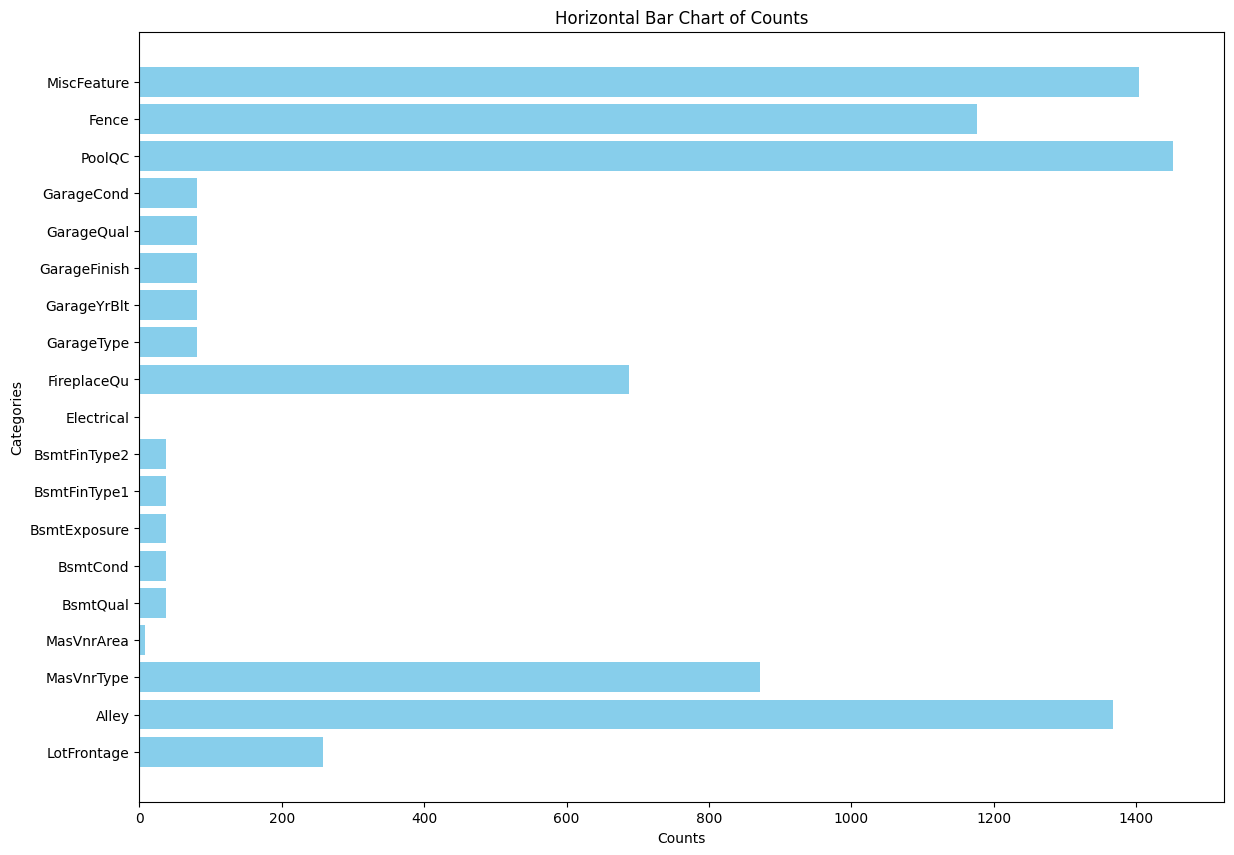

In [271]:
import matplotlib.pyplot as plt

data = columns_with_nulls
# Extract keys (categories) and values (counts)
categories = list(data.keys())
counts = list(data.values())

# Plot the horizontal bar chart
plt.figure(figsize=(14, 10))
plt.barh(categories, counts, color='skyblue')

# Labels and title
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart of Counts')

# Show the plot
plt.show()

In [272]:
columns_to_remove = ['Id']
columns_to_remove += [col for col, count in columns_with_nulls.items() if count > 500]

In [273]:
columns_to_remove

['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataframe_distributions(df):
    """
    Plots the distributions of all columns in a pandas DataFrame, 
    separating categorical and numerical columns.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
    """
    df = df.replace([np.inf, -np.inf], np.nan) #added line to replace inf with nan.

    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    cols_per_row = 5
    # Plot numerical columns
    if len(numerical_cols) > 0:
        num_plots = len(numerical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.histplot(df[col], kde=True) #using histplot instead of distplot, distplot is deprecated
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    # Plot categorical columns
    if len(categorical_cols) > 0:
        num_plots = len(categorical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.countplot(x=df[col])
            plt.title(f'Count of {col}')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
        plt.tight_layout()
        plt.show()


# Plot the distributions

plot_dataframe_distributions(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_target_correlation(df, target_col):
    """
    Plots the correlation between each feature in a DataFrame and a target column.

    For numerical features, it uses scatter plots.
    For categorical features, it uses box plots.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
        target_col (str): The name of the target column.
    """

    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cols_per_row = 5
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found in DataFrame.")
        return

    # Remove the target column from feature lists
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    # Plot numerical feature vs. target
    if len(numerical_cols) > 0:
        num_plots = len(numerical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.regplot(x=df[col], y=df[target_col], scatter_kws={'s':10}) #added regplot
            plt.title(f'{col} vs. {target_col}')
        plt.tight_layout()
        plt.show()

    # Plot categorical feature vs. target
    if len(categorical_cols) > 0:
        num_plots = len(categorical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.boxplot(x=df[col], y=df[target_col])
            plt.title(f'{col} vs. {target_col}')
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot feature-target correlations
plot_feature_target_correlation(df, 'SalePrice')

In [274]:
one_hot_columns = list(X_train[cat_cols].nunique().index)
one_hot_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Preprocess

In [275]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.set_output(transform="pandas")
enc.fit_transform(X_train[cat_cols])

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1181,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1108,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
554,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
287,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
110,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
165,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
219,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [276]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder


class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns, columns_to_remove):
        self.categorical_columns = list(set(categorical_columns) - set(columns_to_remove))
        self.columns_to_remove = columns_to_remove

        # one hot encoder
        self.enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        self.enc.set_output(transform="pandas")

    def fit(self, X, y):
        self.numerical_columns = [col for col in X.columns if X[col].dtype != 'object' and col != 'Id']

        self.enc.fit(X[self.categorical_columns])
        
        return self

    def transform(self, X):
        X_transformed = X.drop(columns = self.columns_to_remove)
        
        print("***")
        print("Fill NaNs in numerical columns with 0-s")
        X_transformed = X_transformed.fillna(value={col: 0 for col in self.numerical_columns})
        

        print("Preprocessing One Hot Columns")
        one_hot_encoded = self.enc.transform(X_transformed[self.categorical_columns])
        X_transformed = pd.concat([X_transformed.drop(columns=self.categorical_columns), one_hot_encoded], axis=1)

        print("Check Nans")
        assert not X_transformed.isna().any().any()
            
        return X_transformed

In [277]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

# model = LinearRegression()
model = RANSACRegressor(random_state=0, min_samples=0.95)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).squeeze()
pipeline = Pipeline([
    ('preprocess', CustomPreprocessor(categorical_columns=one_hot_columns, columns_to_remove=columns_to_remove)),
    ('scaler', StandardScaler()),
    ('model', model)
])

# Fit the pipeline on the entire training set
pipeline.fit(X_train, y_train_scaled)

preds_test = pipeline.predict(test_df)
preds_validation = pipeline.predict(X_val)
preds_train = pipeline.predict(X_train)

preds_test = y_scaler.inverse_transform(preds_test.reshape(-1, 1))
preds_validation = y_scaler.inverse_transform(preds_validation.reshape(-1, 1))
preds_train = y_scaler.inverse_transform(preds_train.reshape(-1, 1))

***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans
***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans
***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans
***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans


In [278]:
preds_test = np.maximum(1000, preds_test)
preds_validation = np.maximum(1000, preds_validation)
preds_train = np.maximum(1000, preds_train)

In [279]:
y_val.mean()

181500.0

In [280]:
preds_validation.mean()

176694.71880172624

In [281]:
preds_test.mean()

178910.22221196973

In [282]:
preds_train.mean()

180767.9406402526

In [283]:
sum(~model.inlier_mask_)

58

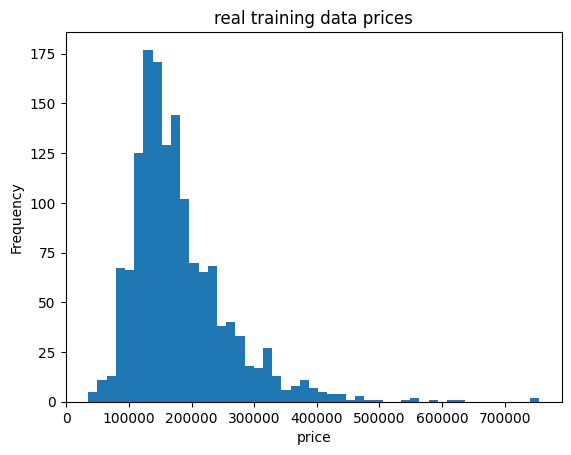

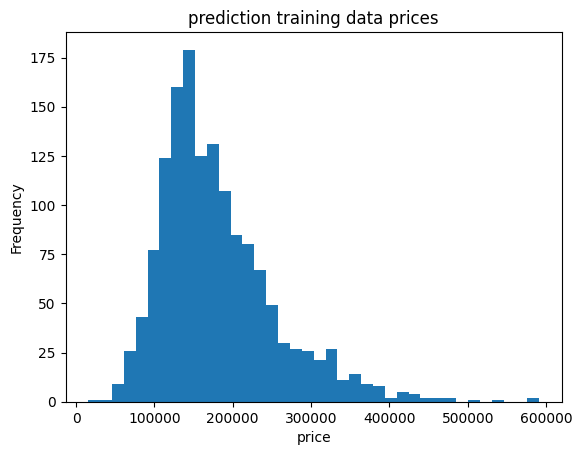

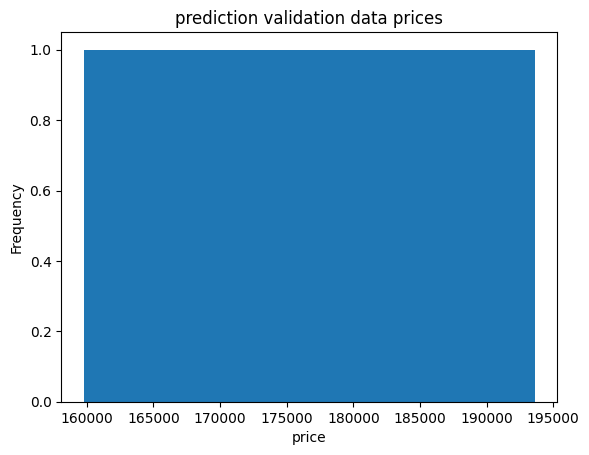

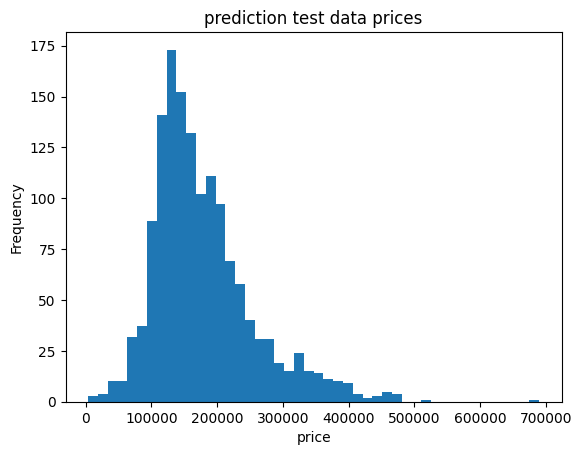

In [284]:
import matplotlib.pyplot as plt

def draw_histogram_auto_bins(data, title="Histogram", xlabel="price", ylabel="Frequency", bin_method='auto'):
    plt.hist(data, bins=bin_method)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

draw_histogram_auto_bins(y_train, title='real training data prices')
draw_histogram_auto_bins(preds_train, title='prediction training data prices')
draw_histogram_auto_bins(preds_validation, title='prediction validation data prices')
draw_histogram_auto_bins(preds_test, title='prediction test data prices')

In [285]:
list(zip(y_val, preds_validation))[:10]

[(190000, array([193614.89809271])), (173000, array([159774.53951074]))]

In [286]:
from sklearn.metrics import root_mean_squared_error, r2_score


def loss_fn(y_true, y_pred):
    return root_mean_squared_error(np.log(y_true), np.log(y_pred))

rmse_val = loss_fn(y_val, preds_validation)
rmse_val

0.05779229379565051

In [287]:
rmse_train = loss_fn(y_train, preds_train)
rmse_train

0.11096668925416112

In [114]:
import mlflow

experiment_name = 'linear_Regression_Pipeline'
run_name = 'seed=40'

mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):
    mlflow.log_param("fillna_numerical_value", 0)
    mlflow.log_param("fillna_categorical_value", 0)
    mlflow.log_param("removed columns", columns_to_remove)
    mlflow.log_param("model_name", "LinearRegression")

    mlflow.log_metric("rmse - validation", rmse_val)
    mlflow.log_metric("rmse - train", rmse_train)
    mlflow.log_metric("random seed", random_seed)

    print(f"Logged run_id: {mlflow.active_run().info.run_id}")

Logged run_id: 98324ab4792248f3ba5567c87d9f0d88
🏃 View run seed=40 at: https://dagshub.com/nmach22/house-prices-ml.mlflow/#/experiments/1/runs/98324ab4792248f3ba5567c87d9f0d88
🧪 View experiment at: https://dagshub.com/nmach22/house-prices-ml.mlflow/#/experiments/1


### Generate Submission file

In [288]:
preds_test

array([[118191.45489307],
       [169790.79074113],
       [191391.2815115 ],
       ...,
       [175789.49302988],
       [110797.1235318 ],
       [219901.85999491]])

In [289]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [290]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': preds_test.squeeze()
})

# Save to CSV
submission.to_csv('Submission_RANSACRegressor(seed=40, split=0.001, min_samples=0.95).csv', index=False)

In [291]:
submission

,Id,SalePrice
0,1461,118191.454893
1,1462,169790.790741
2,1463,191391.281511
3,1464,200232.120685
4,1465,196478.061215
...,...,...
1454,2915,82110.518263
1455,2916,72308.847192
1456,2917,175789.493030
1457,2918,110797.123532
